In [ ]:
'''Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
'''

In [1]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [11]:
# data in columns Age,Cabin and Embarked is missing as we  can see the count is less than the actual count
# now find the min age and max age
train['Age'].min(),train['Age'].max()

(0.41999999999999998, 80.0)

In [12]:
# min age is 0.419 mean less than a year probably for babies and max is 80 years

In [13]:
#find the count of the passenger survived , 0 represents non-survivor and 1 represents survivor in Survived colun
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
# count the surivior percentage
train['Survived'].value_counts()/train['PassengerId'].count()*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [17]:
# as we can see only 38.38 % passengers survived and 61.62 approx. didn't

In [18]:
# classify the passenger based on Sex/Gender
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
#plot a bar graph for the passenger Survived 

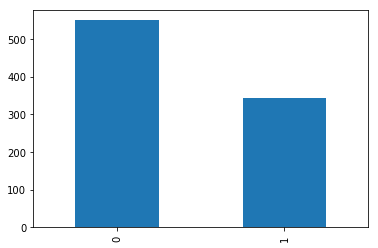

In [23]:
%matplotlib inline
alpha_color = 0.5
train['Survived'].value_counts().plot(kind = 'bar')

In [24]:
# this bar represents the frequency distribution of passengers who Survived('1') or not('0') 

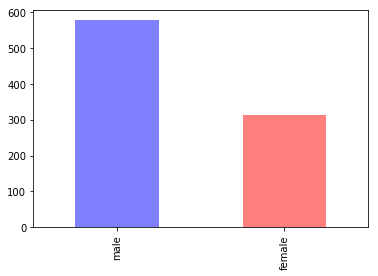

In [25]:
train['Sex'].value_counts().plot(kind = 'bar',color =['b','r'],alpha = alpha_color)

In [26]:
# this bar represents the frequency distribution of passengers who based ob=n gender(Male or female)

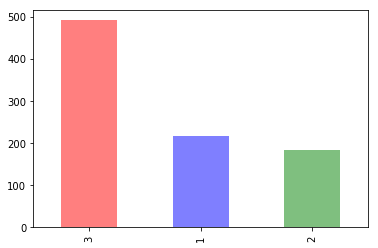

In [30]:
train['Pclass'].value_counts().plot(kind = 'bar',color = ['r','b','g'],alpha = alpha_color)

In [ ]:
# As we can see from the graph that maximum no. of passengers belonged to class 3(cheap fare) than class 1(expensive) 
# then class 2(mid range fare)

In [63]:
train.corr() #find the correlation between the columns in the dataset it comapres only numerical columns


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [28]:
# we can see from the above table fare has the highest +ve value against the Survived column that means more 
# the Fare higher the value in survived column i.e people who paid high fare had higher chance of survival
# but that is not all , Pclass has -ve value against the Survived coulmn which means lesser the class of travel(1-High/priveleged class ,3-low/cheap and less previleged) 
# higher the chance of survival
# same with Age, age is also inversely proportional to the Survived column(-ve value means inverse corelation)
# Sex and Embarked is the missing column which may have an impact so we should verify those columns against the 
# survived 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
# as we can see from above tables that there is no corelation between columns -Name,Sex,Ticket,Cabin,Embarked  to other columns

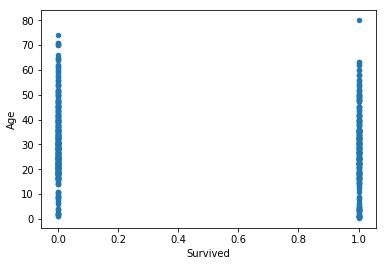

In [61]:
train.plot(kind = 'scatter',x = 'Survived', y ='Age')

In [ ]:
#the above plot is not very definitive since the distribution is between only 2 values

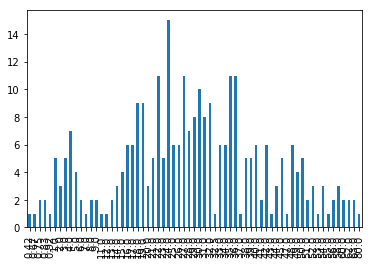

In [34]:
train[train['Survived']==1]['Age'].value_counts().sort_index().plot(kind = 'bar')

In [35]:
#graph creatd above is too fussy, its not very clear since there are too many values on x axis
# so we divide the age groups in groups of 8 age classes 0-10,11-20,21-30 and so on and use pandas cut function
# to do so
bins = [0,10,20,30,40,50,60,70,80]
train['Agebin']=pd.cut(train['Age'],bins)

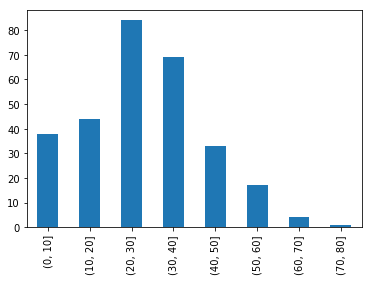

In [36]:
train[train['Survived']==1]['Agebin'].value_counts().sort_index().plot(kind = 'bar')

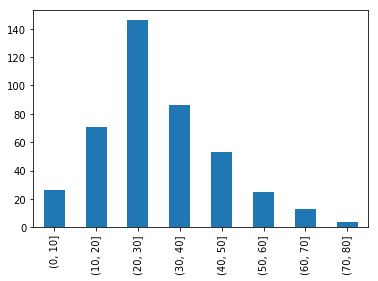

In [39]:
train[train['Survived']==0]['Agebin'].value_counts().sort_index().plot(kind = 'bar')

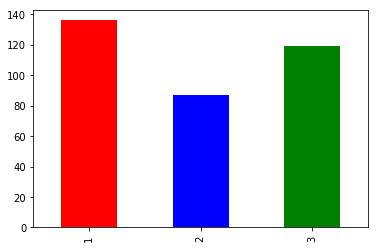

In [89]:
#frequency distribution of Passengers survived vs Passenger Class,
train[train['Survived']==1]['Pclass'].value_counts().sort_index().plot(kind = 'bar',color = ['r','b','g'])

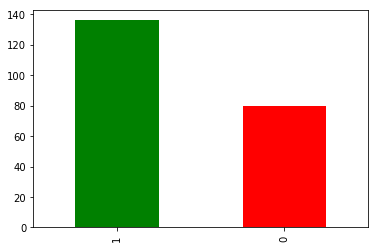

In [93]:
#frequency distribution of passsengers in class 1 against survived
train[train['Pclass']==1]['Survived'].value_counts().plot(kind = 'bar',color = ['g','r'])
#we can see from graph majority passengers in class 1 survived 

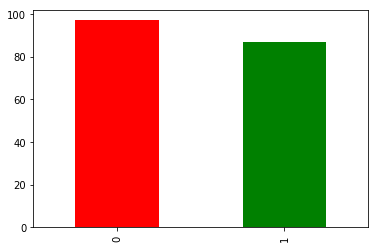

In [92]:
train[train['Pclass']==2]['Survived'].value_counts().plot(kind = 'bar',color = ['r','g'])
#where as in class 2 there is not much of a difference, infact survival rate is low which is 

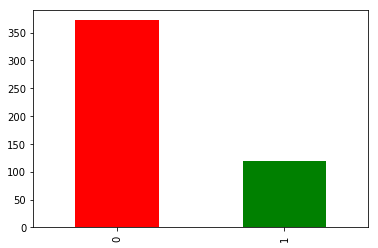

In [94]:
train[train['Pclass']==3]['Survived'].value_counts().plot(kind = 'bar',color = ['r','g'])

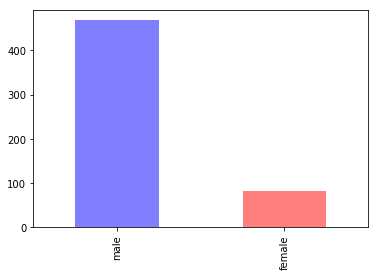

In [95]:
# in class 3 only few passengers survived
#plot survived against the Sex to find is there any relation between them
train[train['Survived']==0]['Sex'].value_counts().plot(kind = 'bar',color = ['b','r'],alpha = alpha_color)

In [67]:
#above plot shows that more male passengers died when compared to female

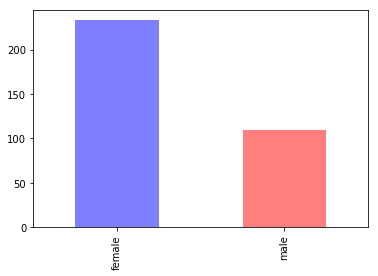

In [96]:
train[train['Survived']==1]['Sex'].value_counts().plot(kind = 'bar',color = ['b','r'],alpha = alpha_color)

In [69]:
#above plot shows that more female passengers survived when compared to male
#in both above bar plots we see that the difference is quite visible its more than 50% 
#so sex is a strong factor in surviving, probably people in charge must have decided to 
#evacuate female passengers first and then men
#after seeing this genlemen behaviour we should also observe this for Age group <15

(78, 13)

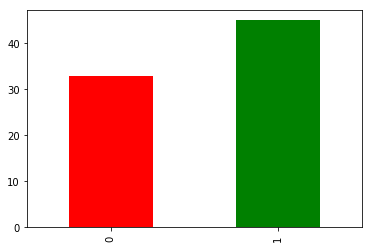

In [97]:
train[train['Age']<15]['Survived'].value_counts().sort_index().plot(kind = 'bar',color = ['r','g'])
train[train['Age']<15].shape

In [79]:
#majority of juveniles survived but the difference is not so convincing

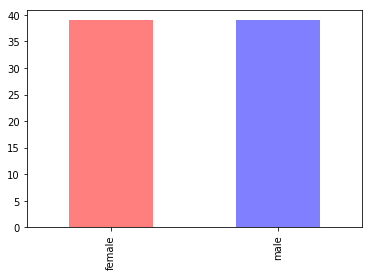

In [99]:
train[train['Age']<15]['Sex'].value_counts().sort_index().plot(kind = 'bar',color = ['r','b'],alpha = alpha_color)

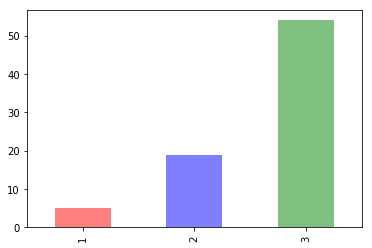

In [100]:
train[train['Age']<15]['Pclass'].value_counts().sort_index().plot(kind = 'bar',color = ['r','b','g'],alpha = alpha_color)

In [85]:
# so above plot shows that there were very few juveniles in class 1 the higher class and most of them were
# in class 3 that is why very few of them survived

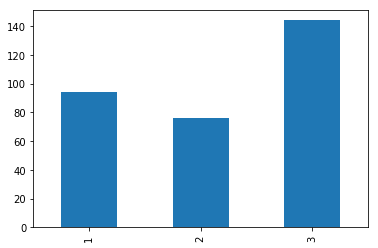

In [87]:
train[train['Sex']=='female']['Pclass'].value_counts().sort_index().plot(kind = 'bar')

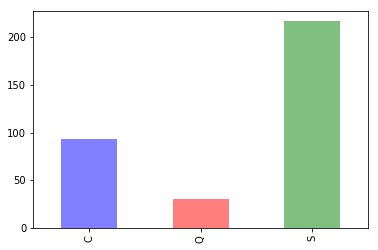

In [102]:
train[train['Survived']==1]['Embarked'].value_counts().sort_index().plot(kind = 'bar',color = ['b','r','g'],alpha = alpha_color)

In [103]:
# the above graph shows that the majority of survivors  happened to board the ship from Southampton port
# this could be coincidence but we should check how many of them were female and how many were in Pclass 1

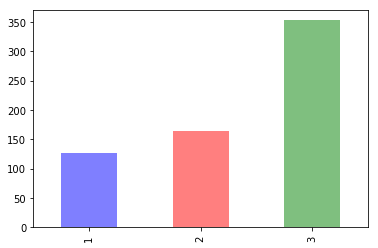

In [104]:
train[train['Embarked']=='S']['Pclass'].value_counts().sort_index().plot(kind = 'bar',color = ['b','r','g'],alpha = alpha_color)

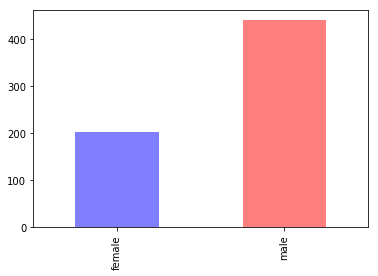

In [105]:
train[train['Embarked']=='S']['Sex'].value_counts().sort_index().plot(kind = 'bar',color = ['b','r','g'],alpha = alpha_color)

In [127]:
#train_temp =train[train['Embarked']=='S'][train['Survived']==1]

In [129]:
#train_female_embark_S_survivor=train_temp[train_temp['Sex']=='female']

In [130]:
#train_female_embark_S_survivor[train_female_embark_S_survivor['Pclass']==1].shape

In [139]:
# So from above observations 'Sex','Pclass',Embarked' are important factors in the dataset to predict the surival
# if a passenger is a female she has high chance of survival and if same female is in class 1 she has
# even higher chance of survival and if she boarded from Southmapton than even more.

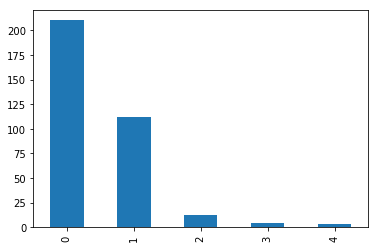

In [141]:
train[train['Survived']==1]['SibSp'].value_counts().sort_index().plot(kind ='bar')
#Survivors with 0 siblings or spouses onboard were in majority

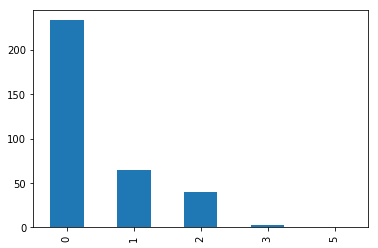

In [142]:
train[train['Survived']==1]['Parch'].value_counts().sort_index().plot(kind ='bar')

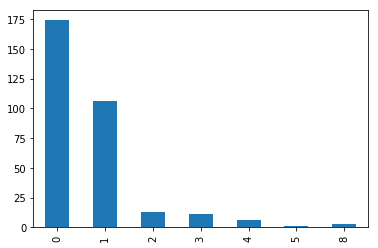

In [143]:
train[train['Sex']=='female']['SibSp'].value_counts().sort_index().plot(kind ='bar')

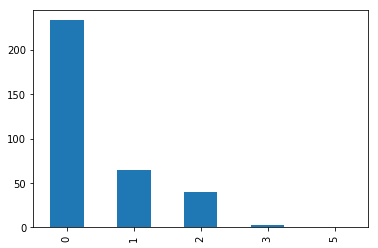

In [144]:
train[train['Survived']==1]['Parch'].value_counts().sort_index().plot(kind ='bar')